# NLP COMMENTS ASSIGNMENT

This work has been carried out by:


*   María Blanco González-Mohíno
*   Pablo Velasco Crespo
*   José Alberto Seco Sánchez-Camacho
*   Adrián Ruíz Esteban

# Data load

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

Load data from github

In [13]:
#!wget https://github.com/MariaBlancoGonzalez/Machine-Learning-22/raw/main/data/raw/comments.csv

In [14]:
comments = pd.read_csv('comments.csv')
comments.head(6)

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...
5,Auto,I had a 1984 Saab a 1996 Saab and now a 1999...


# Preprocessing step

In [15]:
!pip install langdetect
from langdetect import detect
import re

     |████████████████████████████████| 981 kB 4.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=854f6eb9a8c4cf1e6512d163ebe31246a2b381b8adfe7a904a0d43ca9e8331d0
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [16]:
text_list = comments['text'].tolist()
detect(text_list[0])

'en'

Language of the text: English.

Next steps will be develop taking into account the text has been writing in English.

## Remove useless data and all capital letters 


Here is were we extract the useless symbols and set all text to lower words

In [17]:
comments.shape

(600, 2)

In [18]:
useless_symbols = '!"_$%&/()=_ˆ*¡@'

In [19]:
comments['text_without_symbols'] = comments.apply(lambda row:
                                          re.sub(useless_symbols, '', row['text'], flags=re.ASCII), axis=1)
comments['text_without_symbols'] = comments.apply(lambda row: row['text_without_symbols'].lower(), axis=1)

This part is just to test if there are some useless symbols after removing it

In [20]:
x = comments.apply(lambda row: re.findall(u'!"_$%&/()=_ˆ*¡@', row['text_without_symbols']), axis = 1)

In [21]:
for i in x:
  if i != []:
    print(i)

No useless caracter found after this preprocessing step so this has been done correctly

In [22]:
comments.head(4)

,class,text,text_without_symbols
0,Auto,I have recently purchased a J30T with moderat...,i have recently purchased a j30t with moderat...
1,Camera,I bought this product because I need instant ...,i bought this product because i need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...,i have owned my buick since 53000 km and i am...
3,Camera,This was my first Digital camera so I did qui...,this was my first digital camera so i did qui...


In [23]:
comments.shape

(600, 3)

## Remove Contractions

Those are all contractions that we are going to change

In [24]:
contractions = { 
"a'ight":"alright",
"ain't": "am not",
"amn't":"am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'll": "how will",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

Method to replace all contractions

In [25]:
def replace_contractions(sentence):
  sentence= sentence.split(" ")
  for word in sentence:
    if word in contractions:
      sentence.replace(word, contractions.get(word))
  return ' '.join(sentence)

In [26]:
comments['text_no_contractions'] = comments.apply(lambda row: replace_contractions(row['text_without_symbols']), axis=1)
comments.head(4)

,class,text,text_without_symbols,text_no_contractions
0,Auto,I have recently purchased a J30T with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderat...
1,Camera,I bought this product because I need instant ...,i bought this product because i need instant ...,i bought this product because i need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am...
3,Camera,This was my first Digital camera so I did qui...,this was my first digital camera so i did qui...,this was my first digital camera so i did qui...


In [27]:
comments.shape

(600, 4)

## Spelling corrector

We try to implement the

In [28]:
'''
from textblob import TextBlob
text_array = []
for text in comments['text_no_contractions']:
  text_array.append(str(TextBlob(text).correct()))

comments['text_corrected'] = text_array
comments['text_corrected'].head(4)
'''

"\nfrom textblob import TextBlob\ntext_array = []\nfor text in comments['text_no_contractions']:\n  text_array.append(str(TextBlob(text).correct()))\n\ncomments['text_corrected'] = text_array\ncomments['text_corrected'].head(4)\n"

## Finding emojis

In [29]:
def emojis_founder(text):

  if (re.findall(u'\U0001F300-\U0001F5FF | \U0001F600-\U0001F64F | \U0001F680-\U0001F6FA | \u260E-\u26FF-\u2700-\u27BF', text)) != [] :
      print(re.findall(u'\U0001F300-\U0001F5FF | \U0001F600-\U0001F64F | \U0001F680-\U0001F6FA | \u260E-\u26FF-\u2700-\u27BF', text))

In [30]:
for i in comments['text_no_contractions'].tolist():
  emojis_founder(i)

No emojis found in the text, so we will not do anything about it

## Delete repeated words

In [31]:
def delete_repeated(text):
    text = text.split(" ")
    return " ".join([text[i] for i in range(len(text)) if i==0 or text[i]!=text[i-1]])

Here we delete the repeated words like 'great great ...'

In [32]:
comments['text_without_repeated_words'] = comments.apply(lambda row: delete_repeated(row['text_no_contractions']), axis=1)

In [33]:
comments['text_without_repeated_words'][1]

' i bought this product because i need instant gratification  i can t stand the torture of waiting for my photos to come back from the lab  and i don t want to pay extravagant sums for one hour developing  the sony mavica is the perfect solution for the click happy shutterbug who likes to take lots of photos  but doesn t have an in home darkroom or an interest in the nuances of traditional photography the great thing about the mavica is that you can take a photo and instantly see how it turned out on the built in color lcd display  if it sucked  take it again until you get it right  non digital cameras don t come close to offering this feature with film  you take the photo and cross your fingers  if it s a one time shot  forget it  when you re using the sony mavica  you can try a variety of shots  with or without flash  and look at the photos until you get what you want  you can take black and white photos or add a  quot sepia quot  effect that looks like an old tyme photo that you get

## Lemmatizer

In [34]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

The method choose to compute the lemmatize part is the WordNetLemmatizer

In [35]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  # Set the text string to tokens with word_tokenize
    word_list = nltk.word_tokenize(text)
    return (' '.join([lemmatizer.lemmatize(w) for w in word_list]))

text_lemmatized = comments['text_without_repeated_words'].tolist()
text_lemma = []
for text in text_lemmatized:
  text_lemma.append(lemmatize_text(text))

comments['text_lemmatized'] = text_lemma
comments.head(4)

,class,text,text_without_symbols,text_no_contractions,text_without_repeated_words,text_lemmatized
0,Auto,I have recently purchased a J30T with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderate...
1,Camera,I bought this product because I need instant ...,i bought this product because i need instant ...,i bought this product because i need instant ...,i bought this product because i need instant ...,i bought this product because i need instant g...
2,Auto,I have owned my Buick since 53000 km and I am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am ...
3,Camera,This was my first Digital camera so I did qui...,this was my first digital camera so i did qui...,this was my first digital camera so i did qui...,this was my first digital camera so i did qui...,this wa my first digital camera so i did quite...


In [36]:
comments['text_lemmatized'][0]

'i have recently purchased a j30t with moderate mile i shopped for a car that wa looked after and paid more for it a a former auto technician i know what to look for and what to expect yet every time i drive this car i say to my self dam that s a great car and yes i truly do the car affords a level of style and comfort that is beyond compare for the price i had looked at a number of j30 s with some having covered 160k mile i checked them to see where the problem show they were great other than just basic owner neglect the car is extremely quiet and smooth yet doe not distance itself from a mild degree of sportiness performance is smooth yet impressive yet the power is well handled by braking and suspension system of similar refinement the appointment available with the car were somewhat sparse yet the standard of quality and functionality were apparent the bose sound system for example ha remarkable output and clarity without all the fancy dial my only complaint after 15k mile is a lac

In [37]:
comments['text_lemmatized'][1]

'i bought this product because i need instant gratification i can t stand the torture of waiting for my photo to come back from the lab and i don t want to pay extravagant sum for one hour developing the sony mavica is the perfect solution for the click happy shutterbug who like to take lot of photo but doesn t have an in home darkroom or an interest in the nuance of traditional photography the great thing about the mavica is that you can take a photo and instantly see how it turned out on the built in color lcd display if it sucked take it again until you get it right non digital camera don t come close to offering this feature with film you take the photo and cross your finger if it s a one time shot forget it when you re using the sony mavica you can try a variety of shot with or without flash and look at the photo until you get what you want you can take black and white photo or add a quot sepia quot effect that look like an old tyme photo that you get at the county fair a standard

## Store dataframe file after preprocessing

In [30]:
import pickle

comments.to_pickle("comments.pkl")

# Vectorization

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

## TFIDF

In [32]:
vectorizer_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True)

# Fit and transform
data_tfidf = vectorizer_tfidf.fit_transform(comments['text_lemmatized'])

In [33]:


# Esta con stop_words, se podría quitar
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True)

data = vectorizer.fit_transform(comments['text_lemmatized'])
vectorizer.get_feature_names_out()

array(['00', '000', '01', ..., 'zooming', 'zx2', 'zx3'], dtype=object)

In [34]:
tfidf_df = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names_out())
print(tfidf_df)

           00  000   01   02  024  ...  zoomed  zoomey  zooming  zx2  zx3
0    0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
1    0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
2    0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
3    0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
4    0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
..        ...  ...  ...  ...  ...  ...     ...     ...      ...  ...  ...
595  0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
596  0.065498  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
597  0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
598  0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0
599  0.000000  0.0  0.0  0.0  0.0  ...     0.0     0.0      0.0  0.0  0.0

[600 rows x 11736 columns]


In [35]:
#import pickle

#tfidf_df.to_pickle("df_tfidf.pkl")

## TFIDF+N-grams

In [36]:
# Uso de n-gramas:  ngram_range=(min,max)
vectorizer = TfidfVectorizer(ngram_range=(1,3))
data = vectorizer.fit_transform(comments['text_lemmatized'])

comments_df_ngrams =pd.DataFrame(data.toarray(),columns = vectorizer.get_feature_names_out())
comments_df_ngrams

,00,00 00,00 00 from,00 649,00 649 00,00 95,00 95 from,00 after,00 after bringing,00 and,00 and 100,00 and headed,00 and it,00 and wa,00 bottom,00 bottom line,00 but,00 but believe,00 but since,00 cad,00 cad the,00 camera,00 camera in,00 canon,00 canon powershot,00 clearance,00 clearance to,00 digital,00 digital camera,00 for,00 for it,00 for the,00 for this,00 from,00 from brandenburkhart,00 from www,00 give,00 give or,00 here,00 here my,...,zoomey camera cropping,zooming,zooming ability,zooming ability of,zooming after,zooming after you,zooming capability,zooming capability of,zooming etc,zooming etc very,zooming finder,zooming finder and,zooming flash,zooming flash head,zooming in,zooming in and,zooming in film,zooming in from,zooming in on,zooming in the,zooming need,zooming need not,zooming optical,zooming optical now,zooming ratio,zooming ratio with,zooming will,zooming will undermine,zx2,zx2 because,zx2 because of,zx2 bought,zx2 bought my,zx2 for,zx2 for single,zx2 new,zx2 new after,zx3,zx3 where,zx3 where lauded
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.024677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037985,0.0,0.0,0.043997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
import pickle
from google.colab import files

comments_df_ngrams.to_pickle("df_ngrams.pkl")
files.download('df_ngrams.pkl')

## TFIDF + N-grams + POS tagging

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [74]:
# Word tokenization
comments['tokens'] = [word_tokenize(sentence) for sentence in comments['text_lemmatized']]
comments['tokens']

0      [i, have, recently, purchased, a, j30t, with, ...
1      [i, bought, this, product, because, i, need, i...
2      [i, have, owned, my, buick, since, 53000, km, ...
3      [this, wa, my, first, digital, camera, so, i, ...
4      [minolta, dimage, 7hi, is, in, a, digital, slr...
                             ...                        
595    [recently, our, 12, year, old, nissan, stanza,...
596    [i, always, do, a, lot, of, research, before, ...
597    [this, car, is, an, all, around, good, buy, if...
598    [i, waited, to, write, this, until, i, have, h...
599    [i, have, been, a, montero, owner, since, abou...
Name: tokens, Length: 600, dtype: object

In [75]:
tagged = comments['tokens'].apply(nltk.pos_tag)
tagged

0      [(i, NNS), (have, VBP), (recently, RB), (purch...
1      [(i, NN), (bought, VBD), (this, DT), (product,...
2      [(i, NNS), (have, VBP), (owned, VBN), (my, PRP...
3      [(this, DT), (wa, NN), (my, PRP$), (first, JJ)...
4      [(minolta, JJ), (dimage, NN), (7hi, CD), (is, ...
                             ...                        
595    [(recently, RB), (our, PRP$), (12, CD), (year,...
596    [(i, NN), (always, RB), (do, VBP), (a, DT), (l...
597    [(this, DT), (car, NN), (is, VBZ), (an, DT), (...
598    [(i, RB), (waited, VBD), (to, TO), (write, VB)...
599    [(i, NNS), (have, VBP), (been, VBN), (a, DT), ...
Name: tokens, Length: 600, dtype: object

In [91]:
pos_tag = []
sentence = ''
for comment in tagged:
  line = ''
  sentence = ''
  #print(tagged)
  for word in comment:
    #print(word)
    line = f'{word[0]}:{word[1]}'
    #print(line)
    sentence += ' '+ ''.join(line)
  pos_tag.append(sentence)

 #print(pos_tag[1])

In [92]:
pos_tag

[' i:NNS have:VBP recently:RB purchased:VBN a:DT j30t:NN with:IN moderate:JJ mile:NN i:NN shopped:VBD for:IN a:DT car:NN that:WDT wa:NN looked:VBD after:IN and:CC paid:VBD more:JJR for:IN it:PRP a:DT a:DT former:JJ auto:NN technician:JJ i:NN know:VBP what:WP to:TO look:VB for:IN and:CC what:WP to:TO expect:VB yet:RB every:DT time:NN i:JJ drive:VBP this:DT car:NN i:NN say:VBP to:TO my:PRP$ self:NN dam:NN that:WDT s:VBZ a:DT great:JJ car:NN and:CC yes:NN i:NN truly:RB do:VBP the:DT car:NN affords:VBZ a:DT level:NN of:IN style:NN and:CC comfort:NN that:WDT is:VBZ beyond:IN compare:NN for:IN the:DT price:NN i:NN had:VBD looked:VBN at:IN a:DT number:NN of:IN j30:JJ s:NN with:IN some:DT having:VBG covered:VBD 160k:CD mile:NN i:NN checked:VBD them:PRP to:TO see:VB where:WRB the:DT problem:NN show:NN they:PRP were:VBD great:JJ other:JJ than:IN just:RB basic:JJ owner:NN neglect:VBP the:DT car:NN is:VBZ extremely:RB quiet:JJ and:CC smooth:JJ yet:RB doe:VBZ not:RB distance:VB itself:PRP from:IN a

In [93]:
comments['pos_tag'] = pos_tag
comments

,class,text,text_without_symbols,text_no_contractions,text_without_repeated_words,text_lemmatized,tokens,pos_tag
0,Auto,I have recently purchased a J30T with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderat...,i have recently purchased a j30t with moderate...,"[i, have, recently, purchased, a, j30t, with, ...",i:NNS have:VBP recently:RB purchased:VBN a:DT...
1,Camera,I bought this product because I need instant ...,i bought this product because i need instant ...,i bought this product because i need instant ...,i bought this product because i need instant ...,i bought this product because i need instant g...,"[i, bought, this, product, because, i, need, i...",i:NN bought:VBD this:DT product:NN because:IN...
2,Auto,I have owned my Buick since 53000 km and I am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am...,i have owned my buick since 53000 km and i am ...,"[i, have, owned, my, buick, since, 53000, km, ...",i:NNS have:VBP owned:VBN my:PRP$ buick:NN sin...
3,Camera,This was my first Digital camera so I did qui...,this was my first digital camera so i did qui...,this was my first digital camera so i did qui...,this was my first digital camera so i did qui...,this wa my first digital camera so i did quite...,"[this, wa, my, first, digital, camera, so, i, ...",this:DT wa:NN my:PRP$ first:JJ digital:JJ cam...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...,minolta dimage 7hi is in a digital slr with 5...,minolta dimage 7hi is in a digital slr with 5...,minolta dimage 7hi is in a digital slr with 5...,minolta dimage 7hi is in a digital slr with 5 ...,"[minolta, dimage, 7hi, is, in, a, digital, slr...",minolta:JJ dimage:NN 7hi:CD is:VBZ in:IN a:DT...
...,...,...,...,...,...,...,...,...
595,Auto,Recently our 12 year old Nissan Stanza decide...,recently our 12 year old nissan stanza decide...,recently our 12 year old nissan stanza decide...,recently our 12 year old nissan stanza decide...,recently our 12 year old nissan stanza decided...,"[recently, our, 12, year, old, nissan, stanza,...",recently:RB our:PRP$ 12:CD year:NN old:JJ nis...
596,Camera,I always do a lot of research before I buy an...,i always do a lot of research before i buy an...,i always do a lot of research before i buy an...,i always do a lot of research before i buy an...,i always do a lot of research before i buy any...,"[i, always, do, a, lot, of, research, before, ...",i:NN always:RB do:VBP a:DT lot:NN of:IN resea...
597,Auto,This car is an all around good buy If you ar...,this car is an all around good buy if you ar...,this car is an all around good buy if you ar...,this car is an all around good buy if you ar...,this car is an all around good buy if you are ...,"[this, car, is, an, all, around, good, buy, if...",this:DT car:NN is:VBZ an:DT all:RB around:RB ...
598,Auto,I waited to write this until I have had 4 mon...,i waited to write this until i have had 4 mon...,i waited to write this until i have had 4 mon...,i waited to write this until i have had 4 mon...,i waited to write this until i have had 4 mont...,"[i, waited, to, write, this, until, i, have, h...",i:RB waited:VBD to:TO write:VB this:DT until:...


In [94]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
data = vectorizer.fit_transform(comments['pos_tag'])

comments_df_ngrams_pos =pd.DataFrame(data.toarray(),columns = vectorizer.get_feature_names_out())
comments_df_ngrams_pos

,00,00 cd,00 cd 649,00 cd after,00 cd and,00 cd bottom,00 cd but,00 cd cad,00 cd camera,00 cd canon,00 cd cd,00 cd clearance,00 cd digital,00 cd dt,00 cd for,00 cd from,00 cd give,00 cd here,00 cd if,00 cd in,00 cd it,00 cd just,00 cd last,00 cd le,00 cd looking,00 cd making,00 cd new,00 cd nn,00 cd now,00 cd occasional,00 cd online,00 cd per,00 cd personal,00 cd photoshop,00 cd plus,00 cd pm,00 cd pny,00 cd sample,00 cd street,00 cd that,...,zoombrowser nnp,zoombrowser nnp ex,zoomed,zoomed nnp,zoomed nnp pixel,zoomed vbd,zoomed vbd into,zoomed vbn,zoomed vbn forward,zoomed vbn in,zoomed vbn out,zoomey,zoomey nn,zoomey nn camera,zooming,zooming nn,zooming nn ability,zooming nn after,zooming nn capability,zooming nn flash,zooming nn in,zooming nn will,zooming vbg,zooming vbg ability,zooming vbg etc,zooming vbg finder,zooming vbg in,zooming vbg need,zooming vbg optical,zooming vbg ratio,zx2,zx2 nn,zx2 nn because,zx2 nn for,zx2 nn nn,zx2 vbd,zx2 vbd new,zx3,zx3 nn,zx3 nn where
0,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.01926,0.01926,0.0,0.0,0.029646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [95]:
import pickle
from google.colab import files

comments_df_ngrams_pos.to_pickle("df_ngrams_pos.pkl")
files.download('df_ngrams_pos.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## TFIDF + N-grams + POS tagging + other features

**Number of words**

In [45]:
words = 0
words = [words+len(comment) for comment in comments['tokens']]
sum(words)

317618

**Number of sentences**

In [46]:
sentences = 0
sentences = [sentences+(len(comment.split('.'))) for comment in comments['text']]
sum(sentences)

600

# Data Load


In [47]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
from math import ceil

# Model

## TFIDF

### Feature selection

In [48]:
X_clf = df_tfidf

y_clf = comments['class']

y_clf = np.where(y_clf == 'Auto', 0, y_clf)
y_clf = np.where(y_clf == 'Camera', 1, y_clf)
y_clf = y_clf.astype('int')

y_clf

NameError: ignored

K-best selection

In [ ]:
lenght = len(X_clf.columns)
rest_pertcentage = ceil(0.7*len(X_clf.columns))
th_percentage = lenght - rest_pertcentage
print('100% of features: {}\n 70% of features: {}'.format(lenght, rest_pertcentage))

In [ ]:
X_clf_kBest=SelectKBest(score_func=chi2,k=th_percentage).fit_transform(X_clf,y_clf)
X_clf_kBest

In [ ]:
X_clf_kBest.shape

### Classification algorithm: SVM

In [ ]:
type(X_clf_kBest)

In [ ]:
X_clf_train = pd.DataFrame(X_clf_kBest)
X_clf_train.head(2)

In [ ]:
X = X_clf_train[list(X_clf_train.columns)]
y = pd.Series(y_clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [ ]:
parameters = {'kernel':('linear','rbf')}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=3)
results = clf.fit(X_train, y_train)
results

In [ ]:
print(results.best_score_, results.best_params_)

In [ ]:
y_pred = results.predict(X_test)

In [ ]:

tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

In [ ]:
disp = plot_confusion_matrix(results, X_test, y_test,cmap=plt.cm.Blues) 
plt.show()

## TFIDF - N-grams

### Feature selection

In [ ]:
X_clf = comments_df_ngrams

y_clf = comments['class']

y_clf = np.where(y_clf == 'Auto', 0, y_clf)
y_clf = np.where(y_clf == 'Camera', 1, y_clf)
y_clf = y_clf.astype('int')

X_clf 

In [ ]:
lenght = len(X_clf.columns)
rest_pertcentage = ceil(0.7*len(X_clf.columns))
th_percentage = lenght - rest_pertcentage
print('100% of features: {}\n 70% of features: {}'.format(lenght, rest_pertcentage))

In [ ]:
X_clf_kBest=SelectKBest(score_func=chi2,k=th_percentage).fit_transform(X_clf,y_clf)
X_clf_kBest

In [ ]:
X_clf_kBest.shape

### Classification algorithm: SVM

In [ ]:
type(X_clf_kBest)

In [ ]:
X_clf_train = pd.DataFrame(X_clf_kBest)
X_clf_train.head(2)

In [ ]:
X = X_clf_train[list(X_clf_train.columns)]
y = pd.Series(y_clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [ ]:
parameters = {'kernel':('linear','rbf')}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=3)
results = clf.fit(X_train, y_train)
results

In [ ]:
print(results.best_score_, results.best_params_)

In [ ]:
y_pred = results.predict(X_test)

In [ ]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

In [ ]:
disp = plot_confusion_matrix(results, X_test, y_test,cmap=plt.cm.Blues) 
plt.show()

## TFIDF - N-grams - Pos tagging

### Feature selection

In [51]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

import numpy as np
from math import ceil
import pandas as pd

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [52]:
X_clf = comments_df_ngrams_pos

y_clf = comments['class']

y_clf = np.where(y_clf == 'Auto', 0, y_clf)
y_clf = np.where(y_clf == 'Camera', 1, y_clf)
y_clf = y_clf.astype('int')

X_clf

,b0,b0 d2,b0 d2 d4,b0 d6,b0 d6 di,b0 dr,b0 dr no,b1,b1 d0,b1 d0 df,b1 d0 dl,b1 d0 dm,b1 d0 dp,b1 d1,b1 d1 dc,b1 d1 de,b1 d1 dh,b1 d1 dm,b1 d1 dp,b1 d1 ds,b1 d1 dt,b1 d1 dy,b1 d2,b1 d2 d2,b1 d2 df,b1 d2 dm,b1 d2 dp,b1 d2 dt,b1 d2 dv,b1 d2 dw,b1 d3,b1 d3 db,b1 d3 do,b1 d4,b1 d4 di,b1 d4 dt,b1 d5,b1 d5 di,b1 d5 do,b1 d6,...,zy pt,zy pt ba,zy pt ob,zy pt oc,zy pt od,zy pt oe,zy pt of,zy pt og,zy pt oi,zy pt ol,zy pt om,zy pt oo,zy pt op,zy pt oq,zy pt or,zy pt os,zy pt ot,zy pt ou,zy pt ov,zy pt oy,zy pt oz,zy pv,zy pv pa,zy pw,zy pw df,zy pw di,zy pw ni,zz,zz dt,zz dt tf,zz jb,zz jb nt,zz je,zz je nt,zz jh,zz jh ne,zz jl,zz jl zt,zz ni,zz ni no
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [53]:
lenght = len(X_clf.columns)
rest_pertcentage = ceil(0.7*len(X_clf.columns))
th_percentage = lenght - rest_pertcentage
print('100% of features: {}\n 70% of features: {}'.format(lenght, rest_pertcentage))

100% of features: 202303
 70% of features: 141613


In [54]:
X_clf_kBest=SelectKBest(score_func=chi2,k=th_percentage).fit_transform(X_clf,y_clf)
X_clf_kBest

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.25748148e-03, 8.18969179e-05, 2.99366996e-05, ...,
        1.97876191e-04, 7.99756191e-05, 7.99756191e-05],
       [4.25126403e-03, 8.17773191e-05, 2.98929813e-05, ...,
        1.97587221e-04, 7.98588262e-05, 7.98588262e-05],
       [4.24797259e-03, 8.17140049e-05, 2.98698374e-05, ...,
        1.97434244e-04, 7.97969973e-05, 7.97969973e-05]])

In [55]:
X_clf_kBest.shape

(600, 60690)

### Classification algorithm: SVM

In [56]:
type(X_clf_kBest)

numpy.ndarray

In [57]:
X_clf_train = pd.DataFrame(X_clf_kBest)
X_clf_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60650,60651,60652,60653,60654,60655,60656,60657,60658,60659,60660,60661,60662,60663,60664,60665,60666,60667,60668,60669,60670,60671,60672,60673,60674,60675,60676,60677,60678,60679,60680,60681,60682,60683,60684,60685,60686,60687,60688,60689
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009224,0.009224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
X = X_clf_train[list(X_clf_train.columns)]
y = pd.Series(y_clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

In [59]:
parameters = {'kernel':('linear','rbf')}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=3)
results = clf.fit(X_train, y_train)
results

GridSearchCV(cv=3, estimator=SVC(), param_grid={'kernel': ('linear', 'rbf')})

In [60]:
print(results.best_score_, results.best_params_)

0.5738095238095239 {'kernel': 'linear'}


In [61]:
y_pred = results.predict(X_test)

In [62]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

0 71 0 109


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


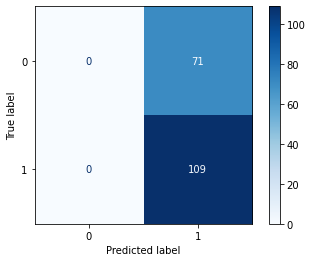

In [63]:
disp = plot_confusion_matrix(results, X_test, y_test,cmap=plt.cm.Blues) 
plt.show()